In [25]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [26]:
import sys

print(sys.executable)

! pip show yfinance

/usr/local/bin/python3.11
Name: yfinance
Version: 0.2.38
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: appdirs, beautifulsoup4, frozendict, html5lib, lxml, multitasking, numpy, pandas, peewee, pytz, requests
Required-by: 


Testing for mean reversion

In [27]:
def Hurst_exponent (ts, max_lag = '30'):
    lags = range(2, max_lag)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]  # Standard deviation of lagged differences hurst exponenet formula
    hurst = np.polyfit(np.log(lags), np.log(tau), 1)[0]  # Linear regression on log-log plot to get Hurst exponent
    return hurst

    ticker = "BA"  # Replace with desired stock symbol
start_date = "2015-01-01"
end_date = "2023-01-01"

# Download historical data
df = yf.download(ticker, start=start_date, end=end_date)
df = df['Close']  # Use closing prices

# Step 2: Calculate the Hurst Exponent
hurst_value = Hurst_exponent(df.values, max_lag=20)

# Step 3: Display Results
print(f"Hurst Exponent for {ticker}: {hurst_value:.2f}")

# Step 4: Interpretation
if hurst_value < 0.5:
    print("The time series is mean-reverting (H < 0.5).")
elif hurst_value > 0.5:
    print("The time series is trending (H > 0.5).")
else:
    print("The time series follows a random walk (H ≈ 0.5).")


[*********************100%%**********************]  1 of 1 completed

Hurst Exponent for BA: 0.54
The time series is trending (H > 0.5).


Implying relatively weak trend 

[*********************100%%**********************]  1 of 1 completed


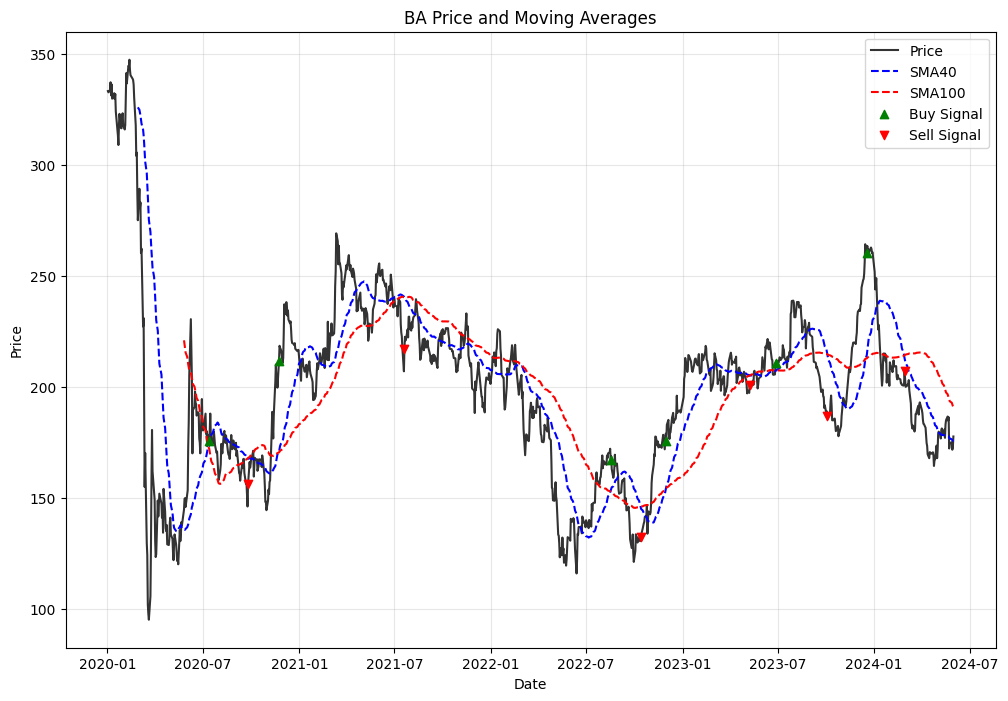

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the strategy
short_window = 40  # Short-term moving average
long_window = 100  # Long-term moving average
stock_symbol = 'BA'  # Stock ticker (Apple in this case)
start_date = '2020-01-01'  # Start date for backtesting
end_date = '2024-06-01'  # End date for backtesting

# Fetch stock data using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Compute short-term and long-term moving averages using Pandas
df['SMA40'] = df['Close'].rolling(window=short_window).mean()
df['SMA100'] = df['Close'].rolling(window=long_window).mean()

# Generate Buy/Sell signals
df['Signal'] = 0  # Default to no position
df.loc[df.index[short_window]:, 'Signal'] = np.where(df['SMA40'][short_window:] > df['SMA100'][short_window:], 1, 0)
df['Position'] = df['Signal'].diff()  # Capture changes in signal

# Plot stock price and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Price', color='k', alpha=0.8)
plt.plot(df['SMA40'], label=f'SMA{short_window}', color='b', linestyle='--')
plt.plot(df['SMA100'], label=f'SMA{long_window}', color='r', linestyle='--')
plt.scatter(df.index[df['Position'] == 1], df['Close'][df['Position'] == 1], 
            marker='^', color='g', label='Buy Signal', zorder=5)
plt.scatter(df.index[df['Position'] == -1], df['Close'][df['Position'] == -1], 
            marker='v', color='r', label='Sell Signal', zorder=5)
plt.title(f'{stock_symbol} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



Using K-means clustering 

[*********************100%%**********************]  1 of 1 completed


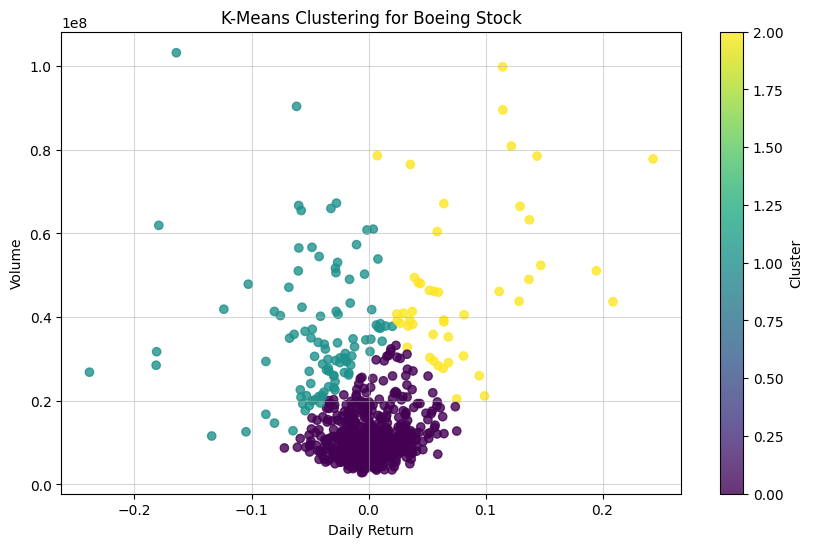

Cluster Centers (Standardized):
[[ 0.03281899 -0.38352721]
 [-1.14304089  1.33636377]
 [ 2.07593873  2.13503919]]
Cluster Centers (Original Scale):
[[ 1.25336241e-03  1.09392350e+07]
 [-4.38275401e-02  3.60084564e+07]
 [ 7.95838530e-02  4.76499913e+07]]


In [29]:
ticker = "BA"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download stock data
df = yf.download(ticker, start=start_date, end=end_date)
df['Daily Return'] = df['Close'].pct_change()  # Calculate daily percentage changes
df.dropna(inplace=True)  # Remove missing value

features = df[['Daily Return', 'Volume']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Daily Return'], df['Volume'], c=df['Cluster'], cmap='viridis', alpha=0.8)
plt.title('K-Means Clustering for Boeing Stock')
plt.xlabel('Daily Return')
plt.ylabel('Volume')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.5)
plt.show()

# Display cluster centroids
print("Cluster Centers (Standardized):")
print(kmeans.cluster_centers_)

# Add cluster centers back to original scale
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(original_centers)

Supervised tensor flow time series forecast

[*********************100%%**********************]  1 of 1 completed


Root Mean Squared Error: 7.40


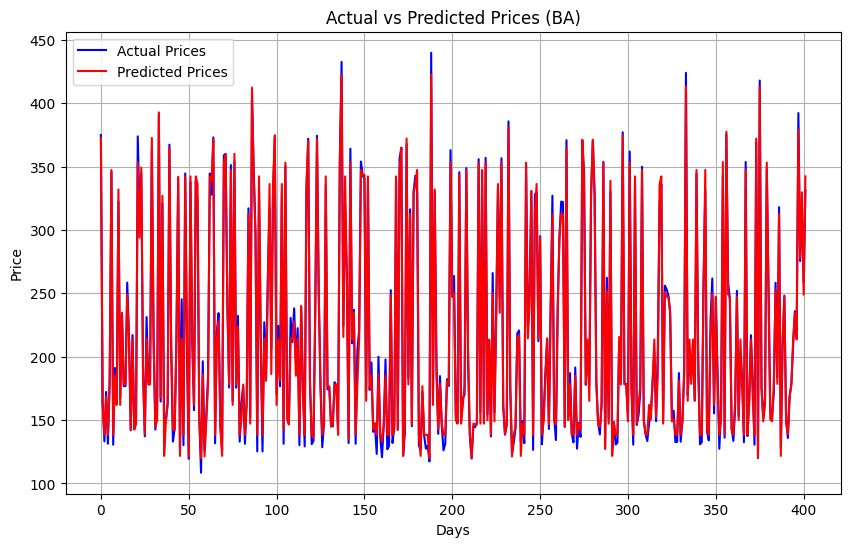

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Fetch stock data
stock_symbol = "BA"  # Replace with the stock ticker you want
start_date = "2015-01-01"
end_date = "2023-01-01"

# Fetch historical stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)
df['Returns'] = df['Close'].pct_change()  # Daily returns
df.dropna(inplace=True)

# Step 2: Feature Engineering
df['Lag1'] = df['Close'].shift(1)  # Previous day's closing price
df['Lag2'] = df['Close'].shift(2)  # 2 days ago closing price
df['Lag3'] = df['Close'].shift(3)  # 3 days ago closing price
df.dropna(inplace=True)

# Target variable: today's closing price
X = df[['Lag1', 'Lag2', 'Lag3']]  # Features
y = df['Close']  # Target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train AdaBoost Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_regressor, n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = adaboost.predict(X_test)

# Step 6: Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# Step 7: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="red")
plt.title(f"Actual vs Predicted Prices ({stock_symbol})")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

**ADD BACKTEST MODEL**


**ADD MORE FEATURES IN THE BACKTEST**